# Exercise 5.08: Classification Using a CART Decision Tree

In this activity we will be using the Breast Cancer dataset [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)]( https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) ) available under the [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/index.php).  The dataset contains characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass, with the labels _malignant_ and _benign_ for each cell nucleus. Throughout this activity we will use the measurements provided in the dataset to classify between malignant and benign cells.

## Import the Required Packages


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Load the Data
Load the Breast Cancer dataset using Pandas and examine the first 5 rows

In [2]:
df = pd.read_csv('../Datasets/breast-cancer-data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## Train the model
Train the decision tree model using all available data.  **Remember that in practice decision trees tend to overfit the training set and thus cross validation should be used (see Lesson Four)**

Before actually going into training a model, lets further split the training dataset into a training and a validation set in the ratio 70:30 to be able to impartially evaluate the model performance later using the validation set.

In [3]:
train_X, valid_X, train_y, valid_y = train_test_split(df[set(df.columns)-{'diagnosis'}], df.diagnosis, 
                                                      test_size=0.3, random_state=123)

Fit the model

In [4]:
model = DecisionTreeClassifier()
model = model.fit(train_X, train_y)
model.score(train_X, train_y)

1.0

The model achieved 100% accuracy when compared against the training set.  Why is this?  Will this always occur for decision trees?

Compare against the test set:

In [5]:
model.score(valid_X, valid_y)

0.9590643274853801

## Visualising the Model

Depending on your system setup you may need to first install the graphviz package before you can visualise the decision tree.  With Anaconda you can enable and run the next cell to install graphviz

In [6]:
# !conda install python-graphviz

In [7]:
import graphviz
from sklearn.tree import export_graphviz

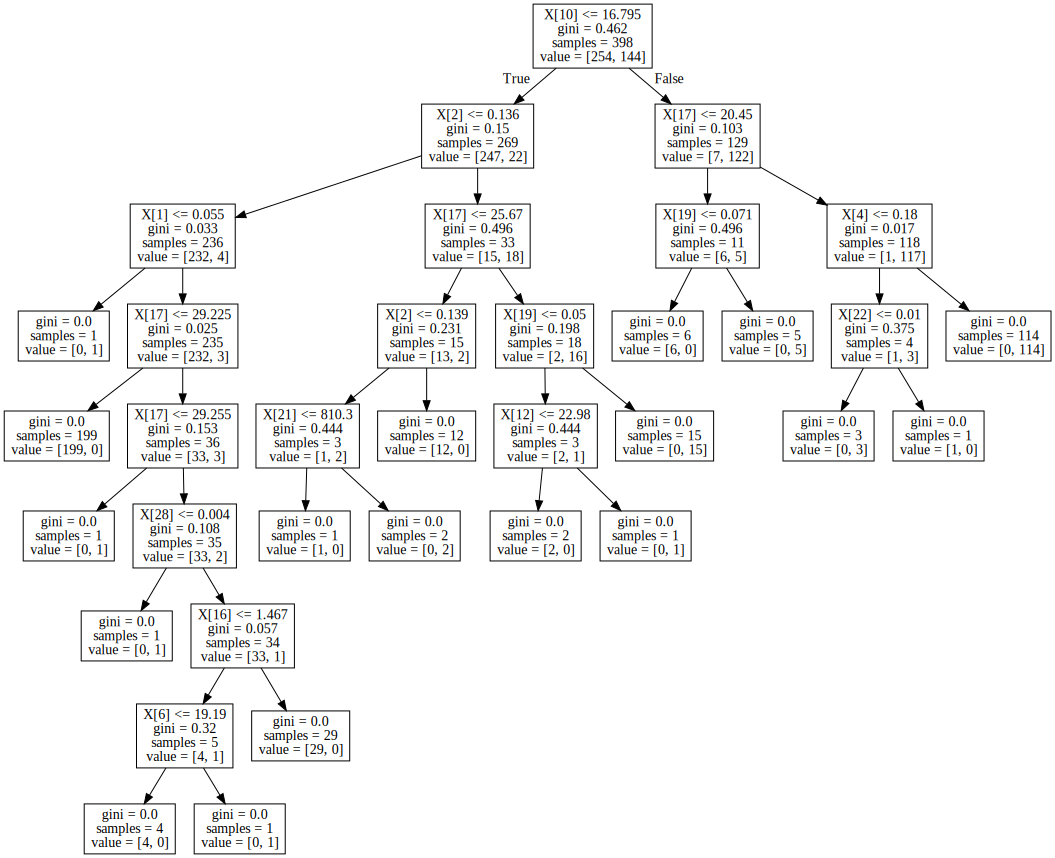

In [8]:
dot_data = export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph